<a href="https://colab.research.google.com/github/ChinlandInfoTech/DataScience/blob/main/INN_ReneWind_Main_Project_LowCode_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace '/content/drive/My Drive/' with the actual path to your files in Google Drive
df = pd.read_csv("/content/drive/My Drive/Train.csv")    # Complete the code to import the training data
df_test = pd.read_csv("/content/drive/My Drive/Test.csv")    # Complete the code to import the test data

# **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
df.shape
# Complete the code to print the shape of the train data

(20000, 41)

In [ ]:
# Checking the number of rows and columns in the test data
df_test.shape # Complete the code to print the shape of the test data

(5000, 41)

In [ ]:
# let's create a copy of the training data
data = df.copy()

In [ ]:
# let's create a copy of the testing  data
data_test = df_test.copy()

## Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head()
# Complete the code to view the first five rows of the train data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
#viewing first 5 rows of the test data
data_test.head() # Complete the code to view the first five rows of the test data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


## Checking the data types of the columns in the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.dtypes
 # Complete the code to view the data types of the columns in the train data

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64
V10,float64


- Converting Target column to float

In [ ]:
data['Target'] = data['Target'].astype(float)

Now checking for test data

In [ ]:
data_test.dtypes# Complete the code to view the data types of the columns in the test data

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64
V10,float64


Converting Target to float

In [ ]:
data_test['Target'] = data_test['Target'].astype(float)

## Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated() # Complete the code to check for duplicate values in the train data

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


## Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
# let's check for missing values in the test data
data_test.isnull().sum() #

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


## Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the datadata.describe()
data.describe()
# Complete the code to view the statistical summary of the train data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


# **Exploratory Data Analysis**

## Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # Histogram
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="skyblue")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="skyblue")

    # Mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

### Variables V1 to V40


In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

In [ ]:
import pandas as pd

def generate_statistical_summary(df):
    """
    Generate a statistical summary (as a DataFrame) for all numeric columns.
    """
    stats_list = []

    for feature in df.select_dtypes(include=['int64', 'float64']).columns:
        series = df[feature].dropna()  # exclude NaNs
        stats = {
            'Feature': feature,
            'Count': series.count(),
            'Mean': series.mean(),
            'Median': series.median(),
            'Std': series.std(),
            'Min': series.min(),
            'Q1 (25%)': series.quantile(0.25),
            'Q3 (75%)': series.quantile(0.75),
            'Max': series.max(),
            'IQR': series.quantile(0.75) - series.quantile(0.25),
            'Outliers': ((series < (series.quantile(0.25) - 1.5 * (series.quantile(0.75) - series.quantile(0.25)))) |
                         (series > (series.quantile(0.75) + 1.5 * (series.quantile(0.75) - series.quantile(0.25))))).sum()
        }
        stats_list.append(stats)

    return pd.DataFrame(stats_list)


In [ ]:
summary_table = generate_statistical_summary(df)
summary_table  # View the first few rows

,Feature,Count,Mean,Median,Std,Min,Q1 (25%),Q3 (75%),Max,IQR,Outliers
0,V1,19982,-0.271996,-0.747917,3.441625,-11.876451,-2.737146,1.840112,15.493002,4.577258,214
1,V2,19982,0.440430,0.471536,3.150784,-12.319951,-1.640674,2.543967,13.089269,4.184640,182
2,V3,20000,2.484699,2.255786,3.388963,-10.708139,0.206860,4.566165,17.090919,4.359305,275
3,V4,20000,-0.083152,-0.135241,3.431595,-15.082052,-2.347660,2.130615,13.236381,4.478274,228
4,V5,20000,-0.053752,-0.101952,2.104801,-8.603361,-1.535607,1.340480,8.133797,2.876087,113
5,V6,20000,-0.995443,-1.000515,2.040970,-10.227147,-2.347238,0.380330,6.975847,2.727568,155
6,V7,20000,-0.879325,-0.917179,1.761626,-7.949681,-2.030926,0.223695,8.006091,2.254621,291
7,V8,20000,-0.548195,-0.389085,3.295756,-15.657561,-2.642665,1.722965,11.679495,4.365630,191
8,V9,20000,-0.016808,-0.067597,2.160568,-8.596313,-1.494973,1.409203,8.137580,2.904176,148
9,V10,20000,-0.012998,0.100973,2.193201,-9.853957,-1.411212,1.477045,8.108472,2.888257,214


### Checking the distrubution of Target variable

In [ ]:
# For train data
df["Target"].value_counts(1)

,proportion
Target,
0,0.9445
1,0.0555


In [ ]:
# For test data
df_test["Target"].value_counts(normalize=True)
# Complete the code to display the proportion of the target variable in the test data

,proportion
Target,
0,0.9436
1,0.0564


## Bivariate Analysis

### Correlation Check

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
def get_highly_correlated_pairs(df, threshold=0.7, exclude_col=None):
    """
    Returns a table of feature pairs with correlation above a given threshold.

    Parameters:
    - df: DataFrame
    - threshold: float (absolute correlation must exceed this)
    - exclude_col: str or None, column to exclude from correlation matrix
    """
    cols = df.select_dtypes(include=np.number).columns.tolist()
    if exclude_col and exclude_col in cols:
        cols.remove(exclude_col)

    corr_matrix = df[cols].corr().abs()

    # Get upper triangle of the correlation matrix (excluding diagonal)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Stack and filter based on threshold
    correlated_pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
    )

    filtered = correlated_pairs[correlated_pairs["Correlation"] >= threshold]
    filtered = filtered.sort_values(by="Correlation", ascending=False).reset_index(drop=True)

    return filtered

In [ ]:
high_corr_pairs = get_highly_correlated_pairs(df, threshold=0.7, exclude_col="Target")
high_corr_pairs

,Feature 1,Feature 2,Correlation
0,V7,V15,0.867871
1,V2,V14,0.853530
2,V16,V21,0.836527
3,V24,V32,0.825119
4,V11,V29,0.811228
5,V8,V16,0.802505
6,V2,V26,0.787440
7,V3,V23,0.785580
8,V25,V27,0.766255
9,V27,V32,0.765733


# **Data Preprocessing**

## Data Preparation for Modeling

In [ ]:
# Dividing train data into X and y
X = data.drop(columns=["Target"], axis=1)  # Remove the 'Target' column from features
y = data["Target"]  # Select the 'Target' column as the label

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y # Complete the code to define the test size
)

In [ ]:
# Checking the number of rows and columns in the X_train data
X_train.shape

(16000, 40)

In [ ]:
# Checking the number of rows and columns in the X_val data
X_val.shape

(4000, 40)

In [ ]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(columns = ['Target'] , axis= 1) # Complete the code to remove the target column
y_test = data_test["Target"] # Complete the code to select the target column

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing Value Imputation


- There were few missing values in V1 and V2, we will impute them using the median.
- And to avoid data leakage we will impute missing values after splitting train data into train and validation sets.




In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)    # Complete the code to impute missing values in the validation set while accounting for data leakage

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)    # Complete the code to impute missing values in the test set while accounting for data leakage

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# **Model Building**

## Model Evaluation Criterion

- Write down the metric of choice with rationale here

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer of 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50    # Complete the code to enter the number of epochs to be used in all models
batch_size = 32    # Complete the code to enter the batch size to be used in all models

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense( 7 ,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and the activation function
model_0.add(Dense( 1 ,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │           287 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295 (1.15 KB)

 Trainable params: 295 (1.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  103.99135971069336


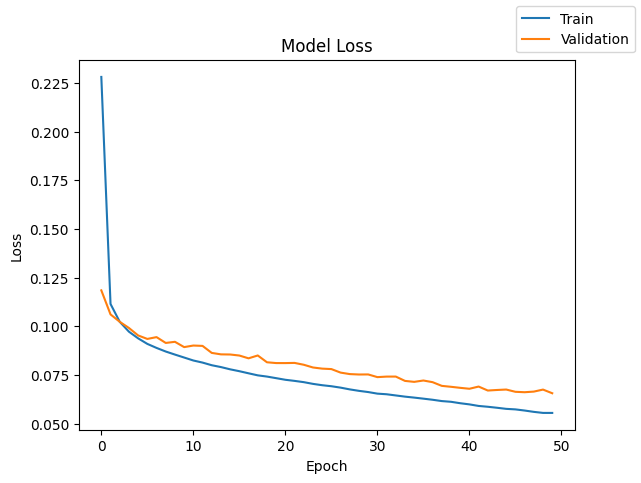

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9875,0.903287,0.974373,0.935582


In [ ]:
model_0_val_perf = model_performance_classification(model_0,X_val,y_val)
model_0_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98625,0.893085,0.971985,0.928478


Let's check the classification reports.

In [ ]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)

Classification Report - Train data Model_0

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.96      0.81      0.88       888

    accuracy                           0.99     16000
   macro avg       0.97      0.90      0.94     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

Classification Report - Validation data Model_0

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.96      0.79      0.86       222

    accuracy                           0.99      4000
   macro avg       0.97      0.89      0.93      4000
weighted avg       0.99      0.99      0.99      4000



# **Model Performance Improvement**

## Model 1

- Let's try adding another layer to see if we can improve our model's performance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_1.add(Dense( 16,activation="relu")) # Complete the code to define the number of neurons and activation function
model_1.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  104.96729707717896


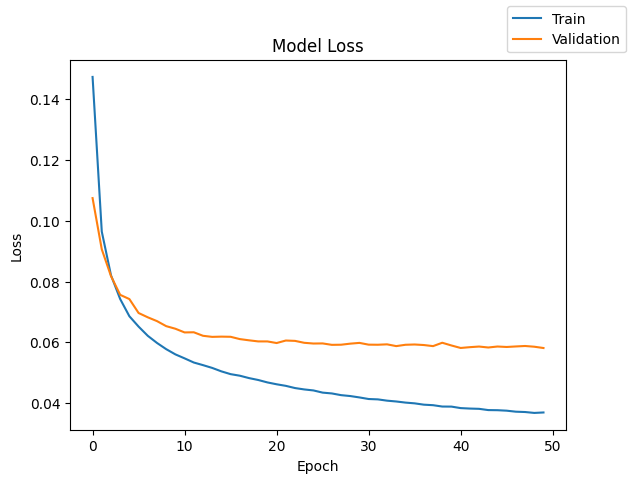

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model_1,X_train,y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992812,0.941607,0.989084,0.963979


In [ ]:
model_1_val_perf = model_performance_classification(model_1,X_val,y_val)
model_1_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.99075,0.927266,0.982974,0.953196


In [ ]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("Classification Report - Train data Model_1", end="\n\n")
cr_train_model_1 = classification_report(y_train,y_train_pred_1 > 0.5)
print(cr_train_model_1)

Classification Report - Train data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15112
         1.0       0.98      0.88      0.93       888

    accuracy                           0.99     16000
   macro avg       0.99      0.94      0.96     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_1", end="\n\n")
cr_val_model_1 = classification_report(y_val,y_val_pred_1 > 0.5)
print(cr_val_model_1)

Classification Report - Validation data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.97      0.86      0.91       222

    accuracy                           0.99      4000
   macro avg       0.98      0.93      0.95      4000
weighted avg       0.99      0.99      0.99      4000



## Model 2

To introduce Regularization in our model, let's set the dropout to 50% after adding the first hidden layer. This step will randomly drop 50% of the neurons before proceeding to the next layer, reducing overfitting.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_2 = Sequential()
model_2.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))  # Complete the code to define the number of neurons and activation function
model_2.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_2.add(Dense(16,activation = "relu")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(8,activation = "relu")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  104.26650595664978


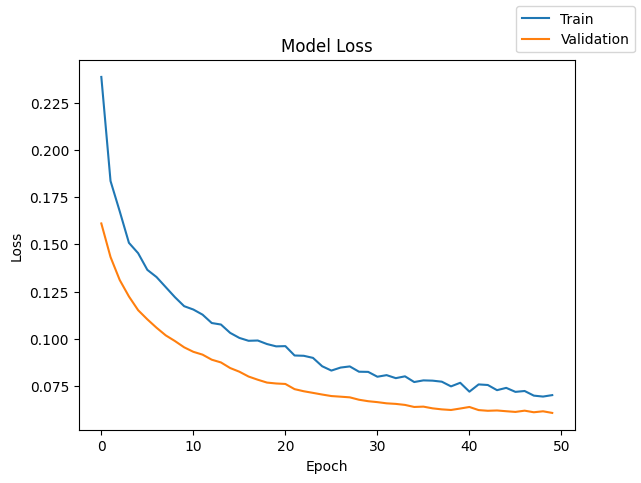

In [ ]:
plot(history,'loss')

Lets check the model performance of model_2 on training and validation data respectively.

In [ ]:
model_2_train_perf = model_performance_classification(model_2,X_train,y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.988375,0.89951,0.988605,0.939032


In [ ]:
model_2_val_perf = model_performance_classification(model_2,X_val,y_val)
model_2_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98825,0.902624,0.983438,0.938881


In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_2 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_2 = classification_report(y_train,y_train_pred_2 > 0.5)
print(cr_train_model_2)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.99      0.80      0.88       888

    accuracy                           0.99     16000
   macro avg       0.99      0.90      0.94     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_2 = classification_report(y_val , y_val_pred_2 > 0.5)
print(cr_val_model_2)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.98      0.81      0.88       222

    accuracy                           0.99      4000
   macro avg       0.98      0.90      0.94      4000
weighted avg       0.99      0.99      0.99      4000



## Model 3

As we have are dealing with an imbalance in class distribution, we should also be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int)) # Convert y_train to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.0587612493382743, 1: 18.01801801801802}

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(32,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_3.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_3.add(Dense(16,activation="relu")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(8, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  101.05972075462341


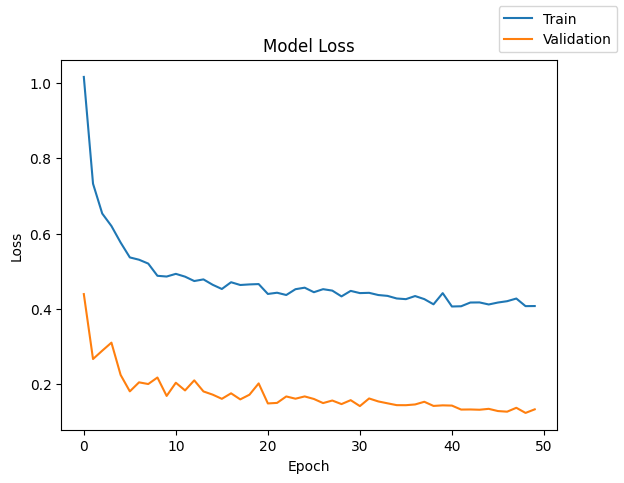

In [ ]:
plot(history,'loss')

Lets check the model performance of model_3 on training and validation data respectively.

In [ ]:
model_3_train_perf = model_performance_classification(model_3,X_train,y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.991,0.950188,0.96297,0.956477


In [ ]:
model_3_val_perf = model_performance_classification(model_3,X_val,y_val)
model_3_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98875,0.928327,0.961769,0.944336


In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Lets check the classification report of model_3 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_3 = classification_report(y_train,y_train_pred_3 > 0.5)
print(cr_train_model_3)

Classification Report - Train data Model_3

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15112
         1.0       0.93      0.90      0.92       888

    accuracy                           0.99     16000
   macro avg       0.96      0.95      0.96     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_3 = classification_report(y_val,y_val_pred_3 > 0.5)
print(cr_val_model_3)

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.93      0.86      0.89       222

    accuracy                           0.99      4000
   macro avg       0.96      0.93      0.94      4000
weighted avg       0.99      0.99      0.99      4000



## Model 4

Since we have used only SGD optimizer till now, let's use another kind of optimizer and observe its impact on the model performmance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(32,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(16,activation="relu")) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  120.0894980430603


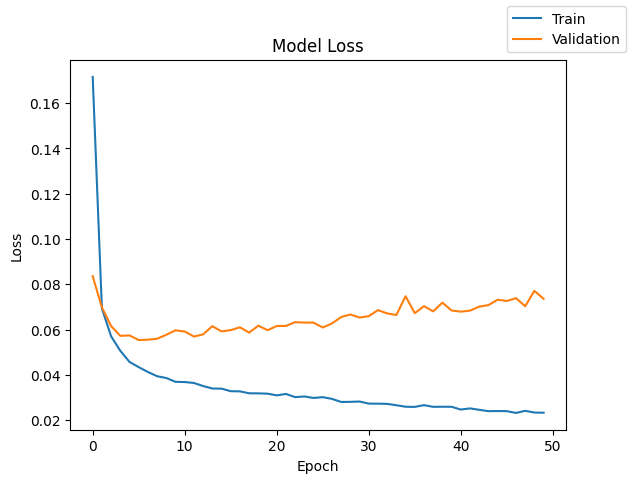

In [ ]:
plot(history,'loss')

Lets check the model performance ofr model_4 on training and validation data respectively

In [ ]:
model_4_train_perf = model_performance_classification(model_4,X_train,y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.995313,0.96201,0.992967,0.976921


In [ ]:
model_4_val_perf = model_performance_classification(model_4,X_val,y_val)
model_4_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.991,0.940118,0.972302,0.955567


In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_4 on raining and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_4", end="\n\n")
cr_train_model_4 = classification_report(y_train,y_train_pred_4 > 0.5)
print(cr_train_model_4)

Classification Report - Train data Model_4

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15112
         1.0       0.99      0.92      0.96       888

    accuracy                           1.00     16000
   macro avg       0.99      0.96      0.98     16000
weighted avg       1.00      1.00      1.00     16000



In [ ]:
print("Classification Report - Validation data Model_4", end="\n\n")
cr_val_model_4 = classification_report(y_val,y_val_pred_4 > 0.5)
print(cr_val_model_4)

Classification Report - Validation data Model_4

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3778
         1.0       0.95      0.88      0.92       222

    accuracy                           0.99      4000
   macro avg       0.97      0.94      0.96      4000
weighted avg       0.99      0.99      0.99      4000



## Model 5

This time we will add more layers and dropout while using a different optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_5 = Sequential()
model_5.add(Dense(32,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_5.add(Dropout(0.5)) #Complete the code to define the dropout rate
model_5.add(Dense(16,activation="relu")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(8, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons and activation function

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  113.51610064506531


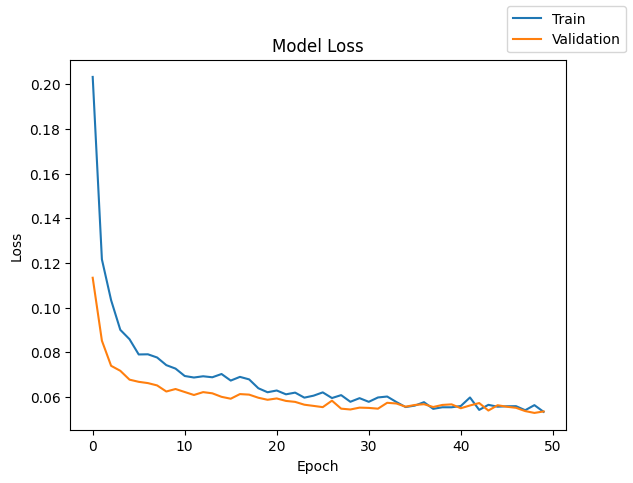

In [ ]:
plot(history,'loss')

Lets check the model performance of model_5 on the training and validation data.

In [ ]:
model_5_train_perf = model_performance_classification(model_5,X_train,y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.99175,0.928326,0.992568,0.957922


In [ ]:
model_5_val_perf = model_performance_classification(model_5,X_val,y_val)
model_5_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9905,0.920774,0.987512,0.95138


In [ ]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Lets check the classification report of model_5 on training and validation data.

In [ ]:
print("Classification Report - Train data Model_5", end="\n\n")
cr_train_model_5 = classification_report(y_train,y_train_pred_5 > 0.5)
print(cr_train_model_5)

Classification Report - Train data Model_5

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15112
         1.0       0.99      0.86      0.92       888

    accuracy                           0.99     16000
   macro avg       0.99      0.93      0.96     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_5", end="\n\n")
cr_val_model_5 = classification_report(y_val,y_val_pred_5 > 0.5)
print(cr_val_model_5)

Classification Report - Validation data Model_5

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.98      0.84      0.91       222

    accuracy                           0.99      4000
   macro avg       0.99      0.92      0.95      4000
weighted avg       0.99      0.99      0.99      4000



## Model 6

Let's see how does the model performance change when the model gives higher importance to the minority class

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_6 = Sequential()
model_6.add(Dense(32,activation="relu",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_6.add(Dropout(0.5)) # Complete the code to define the dropout rate
model_6.add(Dense(16,activation="relu")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(8, activation = "relu")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(1,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.75 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict, ) # Complete the code such that the model is biased towards the minority class
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  108.8259129524231


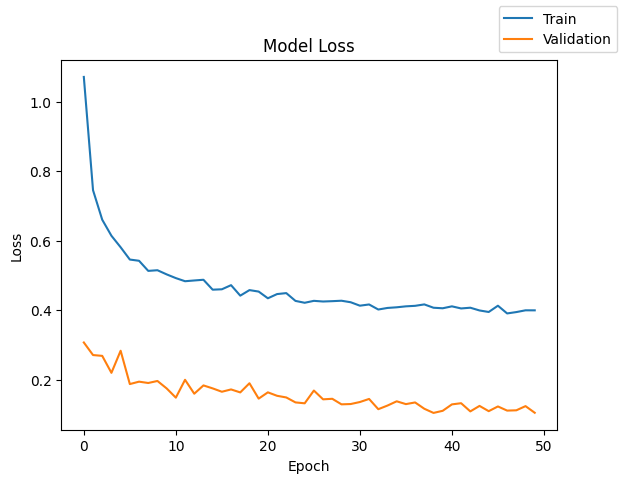

In [ ]:
plot(history,'loss')

Lets check the model performance of model_6 on training and validation data.

In [ ]:
model_6_train_perf = model_performance_classification(model_6,X_train,y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98975,0.951116,0.951116,0.951116


In [ ]:
model_6_val_perf = model_performance_classification(model_6,X_val,y_val)
model_6_val_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9895,0.937204,0.960724,0.948614


In [ ]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Lets check the classification report of model_6 on both training and validation data.

In [ ]:
print("Classification Report - Train data Model_6", end="\n\n")
cr_train_model_6 = classification_report(y_train,y_train_pred_6 > 0.5)
print(cr_train_model_6)

Classification Report - Train data Model_6

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15112
         1.0       0.91      0.91      0.91       888

    accuracy                           0.99     16000
   macro avg       0.95      0.95      0.95     16000
weighted avg       0.99      0.99      0.99     16000



In [ ]:
print("Classification Report - Validation data Model_6", end="\n\n")
cr_val_model_6 = classification_report(y_val,y_val_pred_6 > 0.5)
print(cr_val_model_6)

Classification Report - Validation data Model_6

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.93      0.88      0.90       222

    accuracy                           0.99      4000
   macro avg       0.96      0.94      0.95      4000
weighted avg       0.99      0.99      0.99      4000



# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and test sets.

**Training Performance Comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.987500,0.992812,0.988375,0.991000,0.995313,0.991750,0.989750
Recall,0.903287,0.941607,0.899510,0.950188,0.962010,0.928326,0.951116
Precision,0.974373,0.989084,0.988605,0.962970,0.992967,0.992568,0.951116
F1 Score,0.935582,0.963979,0.939032,0.956477,0.976921,0.957922,0.951116


**Validation Performance Comparison**

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
Accuracy,0.986250,0.990750,0.988250,0.988750,0.991000,0.990500,0.989500
Recall,0.893085,0.927266,0.902624,0.928327,0.940118,0.920774,0.937204
Precision,0.971985,0.982974,0.983438,0.961769,0.972302,0.987512,0.960724
F1 Score,0.928478,0.953196,0.938881,0.944336,0.955567,0.951380,0.948614


**Checking the performance of the best model on the test set**

In [ ]:
# best_model = model_0 ## Uncomment this line in case the best model is model_0
# best_model = model_1 ## Uncomment this line in case the best model is model_1
# best_model = model_2 ## Uncomment this line in case the best model is model_2
# best_model = model_3 ## Uncomment this line in case the best model is model_3
best_model = model_4 ## Uncomment this line in case the best model is model_4
# best_model = model_5 ## Uncomment this line in case the best model is model_5
# best_model = model_6 ## Uncomment this line in case the best model is model_6

In [ ]:
# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9892,0.932596,0.963653,0.947512


In [ ]:
y_test_pred_best = best_model.predict(X_test)

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5) # Check the classification report of best model on test data.
print(cr_test_best_model)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4718
         1.0       0.94      0.87      0.90       282

    accuracy                           0.99      5000
   macro avg       0.96      0.93      0.95      5000
weighted avg       0.99      0.99      0.99      5000



# **Actionable Insights and Recommendations**

- Write down actionable insights here

- Write down business recommendations here